# training


$$
\begin{cases}
\frac{d y}{d t} = - 2 y\\
y(0) = 1
\end{cases}
$$
solve:
$$
y(t) = e^{-2t}
$$

(0, 5)
10000 10000
t [0.00000000e+00 5.00050005e-04 1.00010001e-03 ... 4.99899990e+00
 4.99949995e+00 5.00000000e+00]
y [1.         1.00154981 1.00309892 ... 4.40578852 4.40580591 4.40582329]


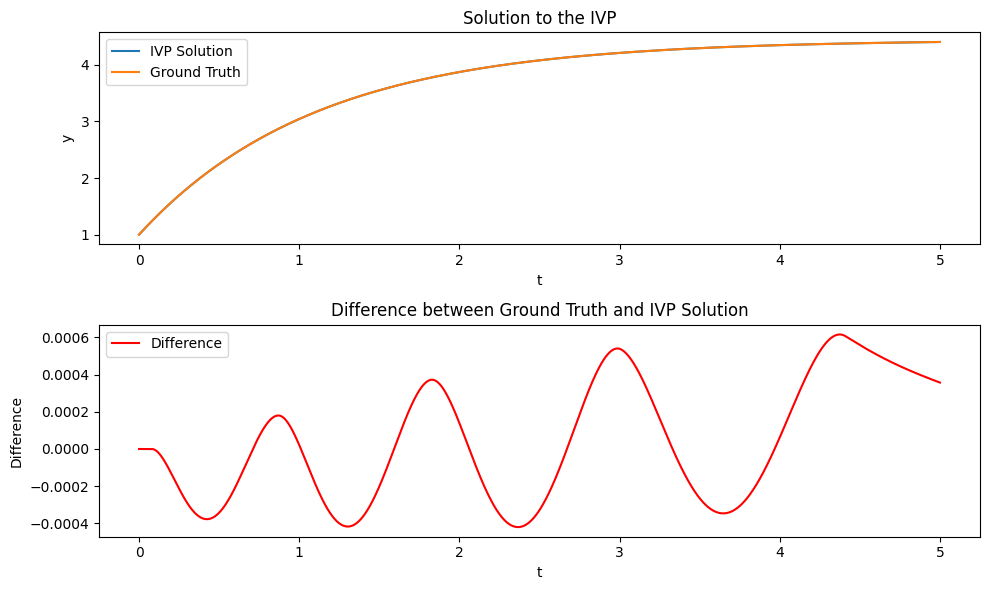

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation
def dydt(t, y):
    return -0.9 * y + 4

# for a dy/dt = ay+b we have a ground truth y = (y0+b/a)e^at - b/a
def ground_truth(a,b,y0,t):
    return (y0+b/a)*np.exp(a*t) - b/a

# Initial condition
y0 = 1

# Time span
t_span = (0, 5)
t_eval = np.linspace(0, 5, 10000)
print(t_span)

# ground truth
tru_y = ground_truth(-0.9,4,y0,t_eval)

# Solve the IVP
sol = solve_ivp(dydt, t_span, [y0], t_eval=t_eval)
print(len(sol.t), len(sol.y[0]))
print('t', sol.t)
print('y', sol.y[0])

# Plot the solution
plt.figure(figsize=(10, 6))

# First subplot for the solution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='IVP Solution') #, marker='o'
plt.plot(sol.t, tru_y, label='Ground Truth') #, marker='s')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution to the IVP')
plt.legend()

# Second subplot for the difference
plt.subplot(2, 1, 2)
plt.plot(sol.t, tru_y - sol.y[0], label='Difference', color='red')
plt.xlabel('t')
plt.ylabel('Difference')
plt.title('Difference between Ground Truth and IVP Solution')
plt.legend()

plt.tight_layout()
plt.show()

### 1.简单的常微分方程初值问题
$$
\begin{cases}
\frac{d y}{d t} = a y + b\\
y(0) = y_0 \in random(-1,1)\\
t \in [0,t_e\in random(1,2)]
\end{cases}
$$
solve:
$$
y(t) = \left(y_0 + \frac{b}{a}\right)e^{at} - \frac{b}{a}
$$
代码上，$x = \left[a,b,y_0,t_e,steps,0,0,0,...,0\right]$

stage1
x shape: torch.Size([64, 41, 20])
tensor(1.1544)
1.1543934345245361
y shape: torch.Size([64, 41, 20])
stage2
16 16
t [0.         0.07695956 0.15391912 0.23087869 0.30783825 0.38479781
 0.46175737 0.53871694 0.6156765  0.69263606 0.76959562 0.84655519
 0.92351475 1.00047431 1.07743387 1.15439343]
y [-0.66074312 -0.77662498 -0.90979355 -1.06275453 -1.23841623 -1.4402179
 -1.67212976 -1.93865294 -2.24482884 -2.59663671 -3.0006798  -3.46466655
 -3.99770649 -4.61031024 -5.31438947 -6.12325695]
truy tensor([-0.6607, -0.7766, -0.9098, -1.0627, -1.2384, -1.4403, -1.6722, -1.9387,
        -2.2448, -2.5965, -3.0005, -3.4647, -3.9979, -4.6106, -5.3144, -6.1230])
truy_shape torch.Size([16])


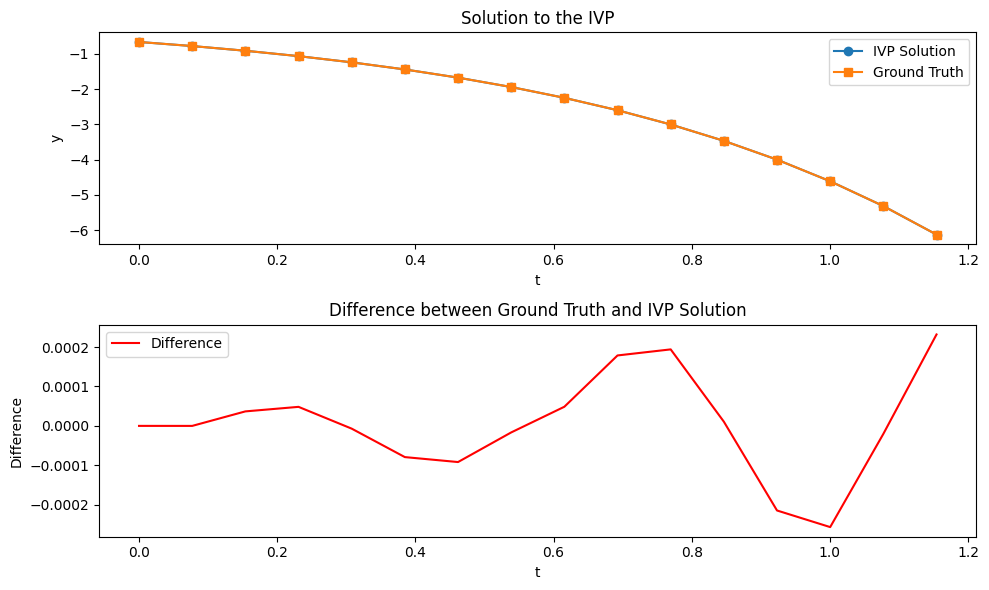

stage3


In [ ]:
from src.samplers import ODEIVPCase1plusSampler,get_data_sampler
from src.tasks import get_task_sampler
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# 测试构造函数的正常情况
def test_odeivp_case1_sampler_construction():
    sampler = ODEIVPCase1plusSampler(n_dims=5)
    assert sampler.n_dims == 5

# 测试 scale 和 bias 的设置
def test_odeivp_case1_sampler_scale_bias():
    sampler = ODEIVPCase1plusSampler(n_dims=3, scale=2.0, bias=1.0)
    assert sampler.scale == 2.0
    assert sampler.bias == 1.0

n_dim = 20
bs = 64
n_p = 41
sampler = ODEIVPCase1plusSampler(n_dims=n_dim)
sx = sampler.sample_xs(b_size=bs,n_points=n_p)


sampler2 = get_data_sampler("ode_ivp_case1plus",n_dim)
sx2 = sampler2.sample_xs(b_size=bs,n_points=n_p)
print("stage1")
print(f"x shape: {sx2.shape}")

task_sampler = get_task_sampler("ode_ivp_case1plus",n_dims=n_dim,batch_size=bs)
task_sampler_args = {}
task = task_sampler(**task_sampler_args)

print(sx2[0,0,3])
print(sx2[0,0,3].item())
ys = task.evaluate(sx2)
print(f"y shape: {ys.shape}")
print("stage2")

def dydt(t, y):
    return sx2[0,0,0].item() * y + sx2[0,0,1].item()

y0 = sx2[0,0,2].item()
steps = int(sx2[0,0,4].item())
# Time span
t_span = (0, sx2[0,0,3].item())
t_eval = np.linspace(0, sx2[0,0,3].item(), steps)
# print(t_eval)

# Solve the IVP
sol = solve_ivp(dydt, t_span, [y0], t_eval=t_eval)
print(len(sol.t), len(sol.y[0]))
print('t', sol.t)
print('y', sol.y[0])
tru_y = ys[0,0,:steps]
print("truy",tru_y)
print("truy_shape",tru_y.shape)

tru_y = tru_y.tolist()
# print("truy_new_shape",tru_y.shape)


# Plot the solution
plt.figure(figsize=(10, 6))

# First subplot for the solution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='IVP Solution', marker='o')
plt.plot(sol.t, tru_y, label='Ground Truth', marker='s')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution to the IVP')
plt.legend()

# Second subplot for the difference
plt.subplot(2, 1, 2)
plt.plot(sol.t, tru_y- sol.y[0], label='Difference', color='red')
plt.xlabel('t')
plt.ylabel('Difference')
plt.title('Difference between Ground Truth and IVP Solution')
plt.legend()

plt.tight_layout()
plt.show()
print("stage3")

In [ ]:
import torch 
losf = task.get_training_metric()
print(losf(torch.tensor(sol.y[0]),torch.tensor(tru_y)))
lossf = task.get_metric()
print(lossf(torch.tensor(sol.y[0]),torch.tensor(tru_y)))

tensor(1.6072e-08, dtype=torch.float64)
tensor([0.0000e+00, 3.0020e-15, 1.3519e-09, 2.3323e-09, 4.9043e-11, 6.2765e-09,
        8.4240e-09, 2.7621e-10, 2.3564e-09, 3.1952e-08, 3.7689e-08, 1.1386e-10,
        4.6112e-08, 6.5975e-08, 4.1072e-10, 5.3827e-08], dtype=torch.float64)


### 2.进阶常微分方程初值问题
$$
\begin{cases}
\frac{d y}{d t} + p(t)y  =q(t)\\
p(t) = \alpha_1 t+\alpha_2\\
q(t)=\beta_1 e^{\beta_2 t}\\
y(0) = y_0 \in random(-1,1)\\
t \in [0,t_e\in random(1,2)]
\end{cases}
$$
solve:
\begin{align*}
f(y,t) &= -p(t)y + q(t)\\
&= -\left(\alpha_1 t + \alpha_2\right) y + \beta_1 e^{\beta_2 t}\\
\end{align*}
考虑微分方程数值解课程上学过的定理:在任意区间$[t_0,t_1] \times[y_0,y_1]$上，$f(y,t)$及其导数是一个连续函数，因此原问题存在唯一解。
$$
y(t) = e^{-\left(\frac{\alpha_1}{2} t^2 + \alpha_2 t\right)} \left( \int_0^{t} \beta_1 e^{\left(\frac{\alpha_1}{2} s^2 + (\alpha_2 + \beta_2) s\right)} \, ds + y_0 \right)
$$

我们得到了解析表达式,但是解析解中有数值积分，故不能简单写出方程的解，那么我们考虑精度，我们可以用数值积分的方法来近似解。

stage1
x shape: torch.Size([64, 41, 20])
a_1 =  -0.8026970624923706 a_2= -1.7288732528686523
b_1= -0.806797981262207 b_2= 2.8730273246765137
y_0= -0.3691648244857788 t_e= 1.8228709697723389 steps= 6.0
tensor(6.)
6.0
y shape: torch.Size([64, 41, 20])
stage2
6 6
t [0.         0.36457419 0.72914839 1.09372258 1.45829678 1.82287097]
y [  -0.36916482   -1.439975     -5.29857829  -19.42157814  -72.03712287
 -276.31961711]
truy tensor([  -0.3692,   -1.4408,   -5.2999,  -19.3663,  -71.9635, -275.9572])
truy_shape torch.Size([6])


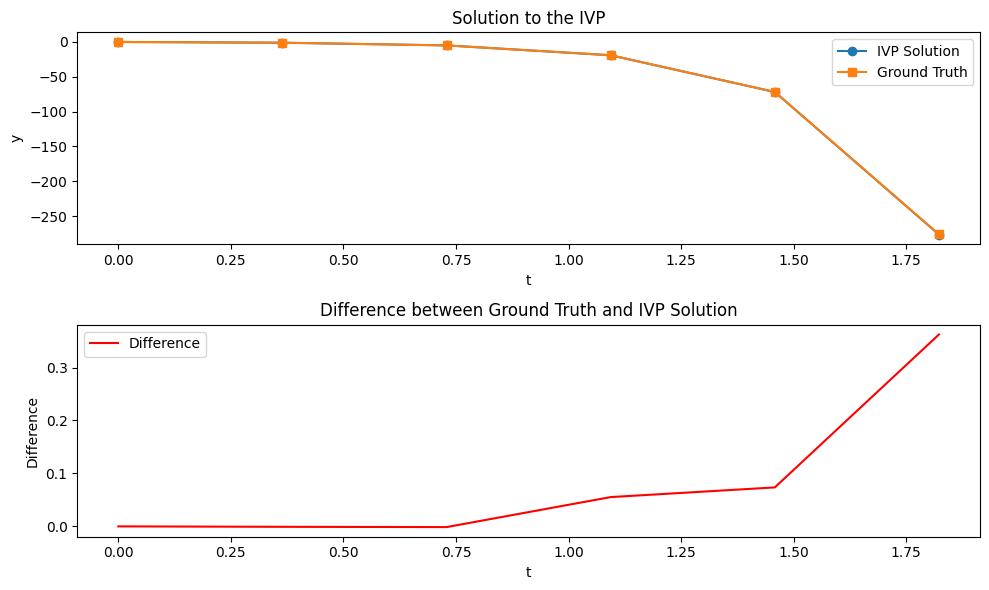

stage3


In [ ]:
from src.samplers import ODEIVPCase2Sampler,get_data_sampler
from src.tasks import get_task_sampler
import numpy as np
import torch
from scipy.integrate import solve_ivp,simpson
import matplotlib.pyplot as plt


n_dim = 20
bs = 64
n_p = 41
sampler = ODEIVPCase2Sampler(n_dims=n_dim)
sx = sampler.sample_xs(b_size=bs,n_points=n_p)


sampler2 = get_data_sampler("ode_ivp_case2",n_dim)
sx2 = sampler2.sample_xs(b_size=bs,n_points=n_p)
print("stage1")
print(f"x shape: {sx2.shape}")
# sampler3 = get_data_sampler("ode_ivp_case2",6)
# sx3 = sampler3.sample_xs(b_size=bs,n_points=n_p)
[a_1, a_2, b_1, b_2, y_0, t_e, steps] = sx2[0,0,:7]
# [a_1, a_2, b_1, b_2, y_0, t_e, steps] = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 20])
print(f"a_1 = ",a_1.item(),"a_2=",a_2.item())
print(f"b_1=",b_1.item(),"b_2=",b_2.item())
print(f"y_0=",y_0.item(),"t_e=",t_e.item(),"steps=",steps.item())
# def ground_truth(t,argss):
#     [a_1, a_2, b_1, b_2, y_0, t_e, steps] = argss
#     def integrand(s, alpha_1, alpha_2, beta_1, beta_2):
#         exponent = (alpha_1 / 2) * s**2 + (alpha_2 + beta_2) * s
#         return beta_1 * np.exp(exponent)

#     # 计算积分
#     integral_result, error = quad(integrand, 0, t_e, args=(a_1, a_2, b_1, b_2), limit=steps * 3)
#     # 计算 y(t)
#     y_t = np.exp(-((a_1 / 2) * t**2 + a_2 * t))(y_0 + integral_result)
#     return y_t
task_sampler = get_task_sampler("ode_ivp_case2plus",n_dims=n_dim,batch_size=bs)
task_sampler_args = {}
task = task_sampler(**task_sampler_args)

print(sx2[0,0,6])
print(sx2[0,0,6].item())
ys = task.evaluate(sx2)
print(f"y shape: {ys.shape}")
print("stage2")

def dydt(t, y):
    return -(a_1*t+a_2)*y+(b_1*np.exp(b_2*t))

y_0 = y_0.item()
steps = int(steps.item())
t_e = t_e.item()
# Time span
t_span = (0, t_e)
t_eval = np.linspace(0, t_e, steps)
# print(t_eval)

# Solve the IVP
sol = solve_ivp(dydt, t_span, [y_0], t_eval=t_eval)
print(len(sol.t), len(sol.y[0]))
print('t', sol.t)
print('y', sol.y[0])
tru_y = ys[0,0,:steps]
print("truy",tru_y)
print("truy_shape",tru_y.shape)

tru_y = tru_y.tolist()
# print("truy_new_shape",tru_y.shape)


# Plot the solution
plt.figure(figsize=(10, 6))

# First subplot for the solution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='IVP Solution', marker='o')
plt.plot(sol.t, tru_y, label='Ground Truth', marker='s')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution to the IVP')
plt.legend()

# Second subplot for the difference
plt.subplot(2, 1, 2)
plt.plot(sol.t, tru_y-sol.y[0], label='Difference', color='red')
plt.xlabel('t')
plt.ylabel('Difference')
plt.title('Difference between Ground Truth and IVP Solution')
plt.legend()

plt.tight_layout()
plt.show()
print("stage3")

a_1 =  1.0 a_2= 1.0
b_1= 1.0 b_2= 1.0
y_0= 1.0 t_e= 2.0 steps= 20.0
20 20
t [0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]
y [1.         1.00019408 1.00136486 1.00461194 1.01123786 1.02237424
 1.03898096 1.06184619 1.09158635 1.12864614 1.17329855 1.2256891
 1.28655678 1.35691221 1.43737861 1.52818503 1.629346   1.74188313
 1.86687018 2.00491497]
truy tensor([1.0000, 1.0002, 1.0015, 1.0052, 1.0121, 1.0234, 1.0399, 1.0624, 1.0915,
        1.1280, 1.1722, 1.2248, 1.2861, 1.3567, 1.4370, 1.5275, 1.6289, 1.7416,
        1.8666, 2.0046])
truy_shape torch.Size([20])


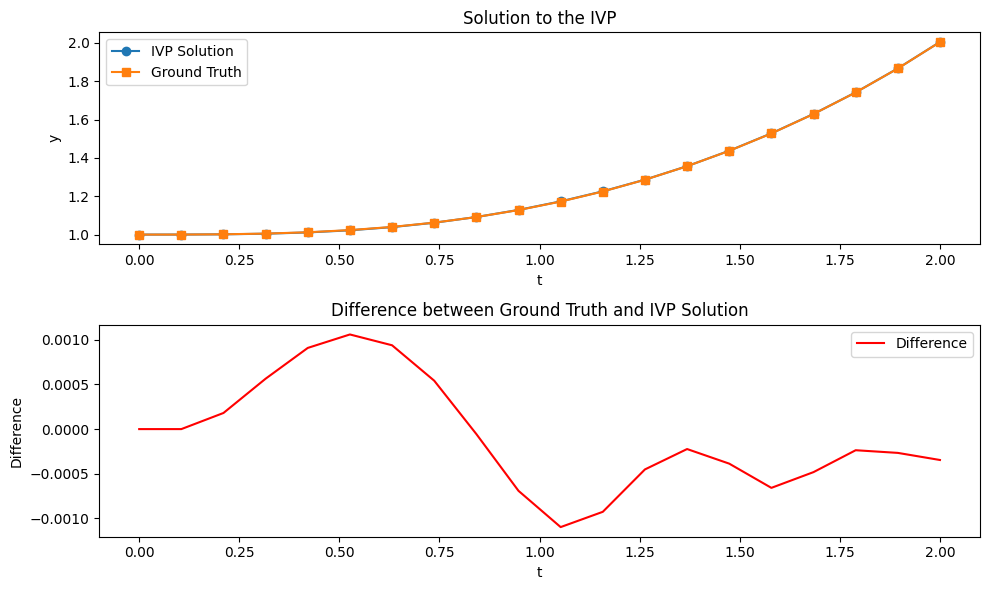

stage3


In [ ]:
from src.samplers import ODEIVPCase2Sampler,get_data_sampler
from src.tasks import get_task_sampler
import numpy as np
import torch
from scipy.integrate import solve_ivp,simpson
import matplotlib.pyplot as plt


# n_dim = 20
# bs = 64
# n_p = 41
# sampler = ODEIVPCase2Sampler(n_dims=n_dim)
# sx = sampler.sample_xs(b_size=bs,n_points=n_p)


# sampler2 = get_data_sampler("ode_ivp_case2",n_dim)
# sx2 = sampler2.sample_xs(b_size=bs,n_points=n_p)
# print("stage1")
# print(f"x shape: {sx2.shape}")
# # sampler3 = get_data_sampler("ode_ivp_case2",6)
# # sx3 = sampler3.sample_xs(b_size=bs,n_points=n_p)
# [a_1, a_2, b_1, b_2, y_0, t_e, steps] = sx2[0,0,:7]
[a_1, a_2, b_1, b_2, y_0, t_e, steps] = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 20])
agrg = [a_1, a_2, b_1, b_2, y_0, t_e, steps]
print(f"a_1 = ",a_1.item(),"a_2=",a_2.item())
print(f"b_1=",b_1.item(),"b_2=",b_2.item())
print(f"y_0=",y_0.item(),"t_e=",t_e.item(),"steps=",steps.item())

def ground_truth_tensor(argss):
    """
    计算变上限积分函数 y(t) 在 [t_0, t_e] 区间内 steps 个均匀分点上的值。
    """
    [a_1, a_2, b_1, b_2, y_0, t_e, steps] = argss
    y_0,steps = y_0.item(),int(steps.item())

    # 创建被积函数
    def integrand(s):
        return b_1 * np.exp((a_1 / 2) * s**2 + (a_2 + b_2) * s)
    
    # 创建新的分点用于计算 y(t)
    new_t_values = np.linspace(0, t_e, steps)
    y_values = []

    # 先计算括号中的函数值，使用simps简化计算
    inbracket = y_0
    y_values.append(inbracket)
    pre_t = 0
    for t in new_t_values[1:]:
        # 总共有steps-1个需要积分计算的区间[pre_t,t]
        # 获取 [pre_t,t] 的分点和对应的被积函数值(5个分点)

        t_slice = np.linspace(pre_t, t, 5)
        integrand_slice = integrand(t_slice)

        # 使用辛普森法则计算五点积分
        integral_result = simpson(integrand_slice, x=t_slice)
        
        inbracket += integral_result

        # 计算 y(t)
        y_t = np.exp(-((a_1 / 2) * t**2 + a_2 * t)) * inbracket
        y_values.append(y_t)
        pre_t = t

    
    return torch.tensor(y_values)

def dydt(t, y):
    return -(a_1*t+a_2)*y+(b_1*np.exp(b_2*t))

y_0 = y_0.item()
steps = int(steps.item())
t_e = t_e.item()
# Time span
t_span = (0, t_e)
t_eval = np.linspace(0, t_e, steps)
# print(t_eval)

# Solve the IVP
sol = solve_ivp(dydt, t_span, [y_0], t_eval=t_eval)
print(len(sol.t), len(sol.y[0]))
print('t', sol.t)
print('y', sol.y[0])
tru_y = ground_truth_tensor(agrg)
print("truy",tru_y)
print("truy_shape",tru_y.shape)

tru_y = tru_y.tolist()
# print("truy_new_shape",tru_y.shape)


# Plot the solution
plt.figure(figsize=(10, 6))

# First subplot for the solution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='IVP Solution', marker='o')
plt.plot(sol.t, tru_y, label='Ground Truth', marker='s')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution to the IVP')
plt.legend()

# Second subplot for the difference
plt.subplot(2, 1, 2)
plt.plot(sol.t, tru_y-sol.y[0], label='Difference', color='red')
plt.xlabel('t')
plt.ylabel('Difference')
plt.title('Difference between Ground Truth and IVP Solution')
plt.legend()

plt.tight_layout()
plt.show()
print("stage3")

In [ ]:
ys = task.evaluate(sx2)
print(f"y shape: {ys.shape}")
print("stage2")

def dydt(t, y):
    return -(a_1*t+a_2)*y+(b_1*np.exp(b_2*t))

y_0 = y_0.item()
steps = int(steps.item())
t_e = t_e.item()
# Time span
t_span = (0, t_e)
t_eval = np.linspace(0, t_e, steps)
# print(t_eval)

# Solve the IVP
sol = solve_ivp(dydt, t_span, [y_0], t_eval=t_eval)
print(len(sol.t), len(sol.y[0]))
print('t', sol.t)
print('y', sol.y[0])
tru_y = ys[0,0,:steps]
print("truy",tru_y)
print("truy_shape",tru_y.shape)

tru_y = tru_y.tolist()
# print("truy_new_shape",tru_y.shape)


# Plot the solution
plt.figure(figsize=(10, 6))

# First subplot for the solution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='IVP Solution', marker='o')
plt.plot(sol.t, tru_y, label='Ground Truth', marker='s')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution to the IVP')
plt.legend()

# Second subplot for the difference
plt.subplot(2, 1, 2)
plt.plot(sol.t, tru_y- sol.y[0], label='Difference', color='red')
plt.xlabel('t')
plt.ylabel('Difference')
plt.title('Difference between Ground Truth and IVP Solution')
plt.legend()

plt.tight_layout()
plt.show()
print("stage3")

y shape: torch.Size([64, 41, 20])
stage2


AttributeError: 'float' object has no attribute 'item'

### 1.1 简单初值问题-变loss计算版

将loss从全域的形式转化为局部（按照steps的变化）的形式，通过局部的loss来更新参数。

In [ ]:
# 
@staticmethod
def get_enhanced_training_metric():
    raise NotImplementedError

@staticmethod
def get_training_steptable():
    raise NotImplementedError

# some test

In [ ]:
import os
from random import randint
import uuid

from quinine import QuinineArgumentParser
from tqdm import tqdm
import torch
import yaml
import numpy as np
# from eval import get_run_metrics
# from tasks import get_task_sampler
# from samplers import get_data_sampler,rand_select_sampler
# from curriculum import Curriculum
# from schema import schema
# from models import build_model
import random
import wandb

In [ ]:
import quinine
print(quinine.__version__)

AttributeError: module 'quinine' has no attribute '__version__'